# Python introduction - session 4 
## Learning about the real power of python with modules
## Biopython, pandas, matplotlib and bedtools wrapped into the jupyter

If you get stuck in an endless loop hit the **"STOP" button (black square)** above or our good friend from bash, **ctrl+c**  
You know you are stuck in a loop if you see **In \[\*\]:** forever

### Installation reminder

If you want to install this whole tool stack on your own machine we recommend the following.

#### Windows

* Install the [Ubuntu subsystem](https://docs.microsoft.com/en-us/windows/wsl/install-win10)
* Install the Linux version of [Anaconda](https://www.anaconda.com/products/individual) into your subsystem.
* Setup [Bioconda](https://bioconda.github.io/) in your subsystem
* Install programs and modules like...

``conda install biopython``

#### Mac

* Install the Mac version of [Anaconda](https://www.anaconda.com/products/individual) on your command line/terminal.
* Setup [Bioconda](https://bioconda.github.io/) on your command line/terminal.
* Install programs and modules like...

``conda install biopython``

### Objectives

* Interogate larger dataset using biopython and pandas.
* Use pandas to combine larger datasets.
* Plot expression profiles across multiple condiditions in Arabidopsis.
* Extract promoter sequences of highly expressed genes.
* Analyze the composition of promoter sequences to identify motifs.

## Reminder: Python objects are like cats and dogs

In [1]:
%matplotlib inline
from IPython.display import Image

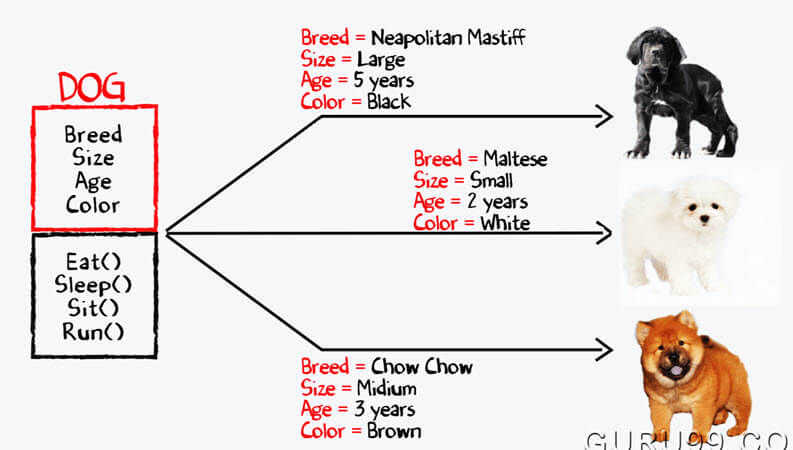

In [2]:
Image(filename='./figures/dogs_as_objects.jpg')

### Intro to [Biopython](https://biopython.org/wiki/Documentation)

* We will download the complete [Arabidopsis](https://www.arabidopsis.org/index.jsp) coding sequences.
* We will read them all in at once.
* We will translate them all into protein sequences.
* We will calcualte their pi values.
* We will do some basic plotting.

#### Let's download sequences from [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FAraport11_genome_release%2FAraport11_blastsets)

In [ ]:
!wget https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_genes.201606.cds.fasta.gz

In [ ]:
!gunzip Araport11_genes.201606.cds.fasta.gz

In [ ]:
!head Araport11_genes.201606.cds.fasta

## Let's reconstruct out lists from last time for all CDS in Arabidopsis

In [48]:
from Bio import SeqIO
from Bio.SeqUtils import IsoelectricPoint as IP
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filename = 'Araport11_genes.201606.cds.fasta'

In [5]:
## Read in all CDS as list (ordered!)
arabidopsis_cds = []
for seq in SeqIO.parse(filename, 'fasta'):
    arabidopsis_cds.append(seq)    

In [6]:
###Let's make a cds length list and an ID list
cds_length = []
ID_list = []
for cds in arabidopsis_cds:
    cds_length.append(len(cds.seq))
    ID_list.append(cds.id)

In [10]:
###Let's make a protein list and a protein length list
arabidopsis_proteins = []
protein_length = []
for cds in arabidopsis_cds:
    tmp_protein = cds.translate() #translate sequence
    tmp_protein.id = cds.id #add id to tmp_protein object
    tmp_protein.name = cds.name #add name to tmp_protein object 
    tmp_protein.description = cds.description #add description to tmp_protein object
    arabidopsis_proteins.append(tmp_protein) #store it
    protein_length.append(len(tmp_protein)) #store length

In [13]:
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq) #generate a Isoelectric point object to be able to calcuate pi values
    tmp_protein_pi = tmp_protein.pi() #calculate pi value
    protein_pi_values.append(tmp_protein_pi)

## Exercise I

* Make a dictionary called ara_dict
* the keys 'Gene_ID', 'CDS_length', 'protein_length', 'protein_pi_value'
* the values are the corresponding lists we generated above

In [14]:
ara_dict = {}
ara_dict['Gene_ID'] = ID_list
ara_dict['CDS_length'] = cds_length
ara_dict['protein_length'] = protein_length
ara_dict['protein_pi_value'] = protein_pi_values

### Intro to [pandas](https://pandas.pydata.org/)

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. 

* We will generate a dataframe (Table) from our own input data
* We will subset the dataframe to find the longest and shortes CDS in Arabidopsis
* We will caclulate the mean, median, and standard deviation for our dataset
* We will do some basic plotting.
* We will load some public expression datasets.
* We will interogate this dataset.
* We will pull out the promoters of the most highly expressed genes and look for a specific hormone response elements.

#### The two main objects in pandas 

* Series to store one dimensional data
* Dataframe to store two dimnesional data

See for a quick intro [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

In [33]:
ara_df = pd.DataFrame.from_dict(ara_dict)

In [34]:
ara_df

,Gene_ID,CDS_length,protein_length,protein_pi_value
0,AT1G01010.1,1290,430,5.101379
1,AT1G01020.1,738,246,8.908997
2,AT1G01020.2,576,192,8.795715
3,AT1G01020.3,711,237,9.136292
4,AT1G01020.4,711,237,9.136292
...,...,...,...,...
48354,ATMG01350.1,438,146,4.690613
48355,ATMG01360.1,1584,528,7.786682
48356,ATMG01370.1,336,112,10.272400
48357,ATMG01400.1,318,106,10.078308


In [35]:
## look at the top
ara_df.head()

,Gene_ID,CDS_length,protein_length,protein_pi_value
0,AT1G01010.1,1290,430,5.101379
1,AT1G01020.1,738,246,8.908997
2,AT1G01020.2,576,192,8.795715
3,AT1G01020.3,711,237,9.136292
4,AT1G01020.4,711,237,9.136292


In [36]:
## look at the bottom
ara_df.tail()

,Gene_ID,CDS_length,protein_length,protein_pi_value
48354,ATMG01350.1,438,146,4.690613
48355,ATMG01360.1,1584,528,7.786682
48356,ATMG01370.1,336,112,10.272400
48357,ATMG01400.1,318,106,10.078308
48358,ATMG01410.1,615,205,9.579773


In [37]:
## Get the column index
ara_df.columns

Index(['Gene_ID', 'CDS_length', 'protein_length', 'protein_pi_value'], dtype='object')

In [38]:
## Get row index
ara_df.index

RangeIndex(start=0, stop=48359, step=1)

In [39]:
## Get specific columns
ara_df['Gene_ID']

0        AT1G01010.1
1        AT1G01020.1
2        AT1G01020.2
3        AT1G01020.3
4        AT1G01020.4
            ...     
48354    ATMG01350.1
48355    ATMG01360.1
48356    ATMG01370.1
48357    ATMG01400.1
48358    ATMG01410.1
Name: Gene_ID, Length: 48359, dtype: object

In [40]:
## Reset the index
ara_df.index = ara_df['Gene_ID']

In [41]:
## Drop a column
ara_df.drop('Gene_ID', axis=1)

,CDS_length,protein_length,protein_pi_value
Gene_ID,,,
AT1G01010.1,1290,430,5.101379
AT1G01020.1,738,246,8.908997
AT1G01020.2,576,192,8.795715
AT1G01020.3,711,237,9.136292
AT1G01020.4,711,237,9.136292
...,...,...,...
ATMG01350.1,438,146,4.690613
ATMG01360.1,1584,528,7.786682
ATMG01370.1,336,112,10.272400


In [42]:
## Drop a column inplace
ara_df.drop('Gene_ID', axis=1, inplace = True)

### A word about pandas axis

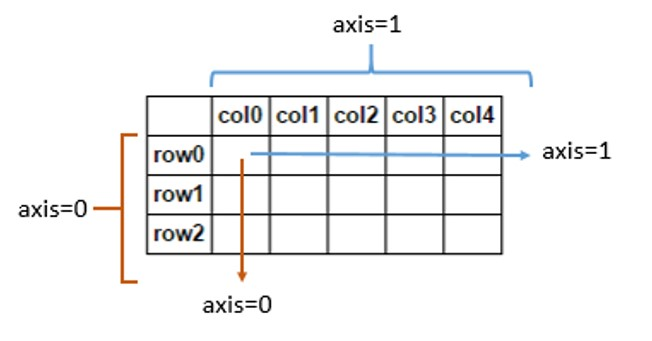

In [27]:
Image(filename='./figures/axis_pandas.jpg')

### Getting the mean, max, min, and such from a dataset

In [43]:
## maximum
ara_df['CDS_length'].max()

16203

In [53]:
## mean
ara_df['CDS_length'].mean()

1296.7666618416426

### Exercise II

* Get the mean value of protein_length column
* Get the max value of the protein_length column
* Get the standard deviation of the protein lenght column
* Get the mean value of the protein_pi_value column

### Plotting is your friend and build into pandas

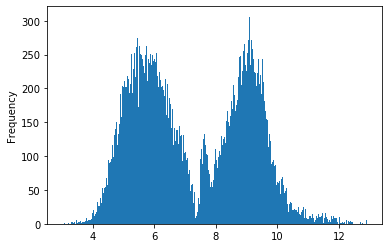

In [54]:
##histogram plot of protein_pi_value
ara_df['protein_pi_value'].plot.hist(bins=500)

Text(0.5, 0, 'PI value [pH]')

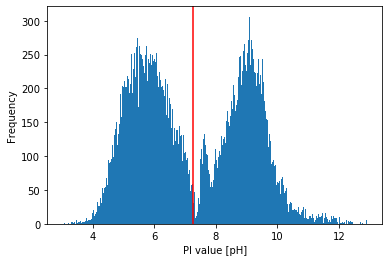

In [51]:
##histogram plot with horizontal line of the 
ara_df['protein_pi_value'].plot.hist(bins=500)
plt.axvline(ara_df['protein_pi_value'].mean(), c='r')
plt.xlabel('PI value [pH]')

## Always look at your distributions genome data is never?! normally distributed

### Subsetting your data

In [56]:
## CDS that are longer than the mean
ara_df['CDS_length'] > ara_df['CDS_length'].mean() 

Gene_ID
AT1G01010.1    False
AT1G01020.1    False
AT1G01020.2    False
AT1G01020.3    False
AT1G01020.4    False
               ...  
ATMG01350.1    False
ATMG01360.1     True
ATMG01370.1    False
ATMG01400.1    False
ATMG01410.1    False
Name: CDS_length, Length: 48359, dtype: bool

In [58]:
## Dataframe and Series have shapes
ara_df['CDS_length'].shape

(48359,)

In [60]:
## Dataframe and Series have shapes
ara_df.shape

(48359, 3)

In [59]:
(ara_df['CDS_length'] > ara_df['CDS_length'].mean()).shape

(48359,)

In [61]:
## Because comparisons return the same shaped boolean series we can use them to subset dataframes
ara_df[ara_df['CDS_length'] > ara_df['CDS_length'].mean()]

,CDS_length,protein_length,protein_pi_value
Gene_ID,,,
AT1G01040.1,5730,1910,5.877258
AT1G01040.2,5733,1911,5.877258
AT1G01060.1,1938,646,5.765198
AT1G01060.2,1938,646,5.765198
AT1G01060.3,1938,646,5.765198
...,...,...,...
ATMG00513.1,1446,482,7.583801
ATMG00520.1,2019,673,10.063538
ATMG00580.1,1488,496,9.274353


In [63]:
### We can also use boolean series to count
(ara_df['CDS_length'] > ara_df['CDS_length'].mean()).sum()

18702

### Exercise III

* How many proteins are longer than 1000 aa.
* How many CDS are longer than the mean plus two standard deviations.
* What is the mean length of proteins longer than 2000 aa.